# Generating IC's given a power spectrum

In [1]:
import cosmax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax

In [9]:
# load binary files
file = '../data/z0.bin'

# open file
with open(file, 'rb') as f:
    # read data
    data = f.read()
    # convert to numpy array
    rho = jnp.frombuffer(data, dtype=jnp.float32)

# reshape data
N = 256
rho = rho.reshape(N, N, N)
rho *= 2.777 * 10**11

rho = rho[::4, ::4, ::4]
N = 64

MPH_h = 60

delta = cosmax.helpers.compute_overdensity(rho)

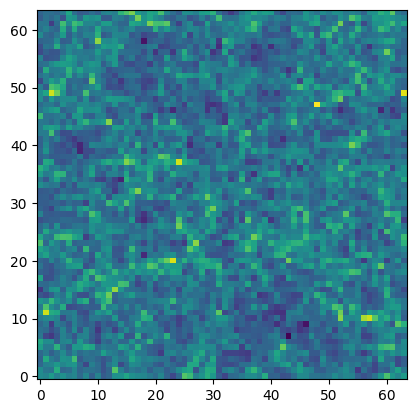

In [10]:
# plot data
plt.figure()
plt.imshow(jnp.log(rho[N//2]), origin='lower')

In [12]:
scaling = 0.00001
pos_lag, pos, mass = cosmax.tools.fit_field(
    key=jax.random.PRNGKey(0),
    N=N,
    field=rho * scaling,
    total_mass=jnp.sum(rho * scaling),
    iterations=100,
    learning_rate=0.001)

mass = mass / scaling

Traced<ShapedArray(float32[3,262144])>with<DynamicJaxprTrace(level=1/0)>
Loss: 0.010507356375455856


In [13]:
# get the positions of the particles which are in the center slice
print(pos.min(), pos.max()) 

-0.148705 1.1522987
